In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load data from CSV file
data = pd.read_csv('data7.csv')

# Split data into input features (X) and output variable (y)
X = data.drop('Output', axis=1)
y = data['Output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define models
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Support Vector Machine': SVC()}

# Train and evaluate models
for name, model in models.items():
    print(name)
    print('---')
    # Train classifier on training set
    model.fit(X_train, y_train)
    
    # Evaluate classifier on testing set
    score = model.score(X_test, y_test)
    print("Model score: ", score)
    
    # Predict output variable on testing set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: \n',cm)
    
    # Compute classification report
    report = classification_report(y_test, y_pred)
    print("Classification report:\n", report)
    
    # Compute evaluation metrics
    testing_accuracy = cm.diagonal().sum() / cm.sum()
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
    fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0])
    fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])
    fdr = cm[0, 1] / (cm[0, 1] + cm[1, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    
    # Print evaluation metrics
    print("Testing accuracy: ", testing_accuracy)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("False positive rate: ", fpr)
    print("False negative rate: ", fnr)
    print("False discovery rate: ", fdr)
    print("Negative predictive value: ", npv)
    print('---\n')


Logistic Regression
---
Model score:  0.8888888888888888
Confusion Matrix: 
 [[33  9]
 [ 0 39]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        42
           1       0.81      1.00      0.90        39

    accuracy                           0.89        81
   macro avg       0.91      0.89      0.89        81
weighted avg       0.91      0.89      0.89        81

Testing accuracy:  0.8888888888888888
Sensitivity:  1.0
Specificity:  0.7857142857142857
False positive rate:  0.21428571428571427
False negative rate:  0.0
False discovery rate:  0.1875
Negative predictive value:  1.0
---

K-Nearest Neighbors
---
Model score:  0.8641975308641975
Confusion Matrix: 
 [[33  9]
 [ 2 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        42
           1       0.80      0.95      0.87        39

    accuracy                           0.86  

Logistic Regression
---
K-Nearest Neighbors
---
Decision Tree
---
AdaBoost
---
Random Forest
---
Support Vector Machine
---


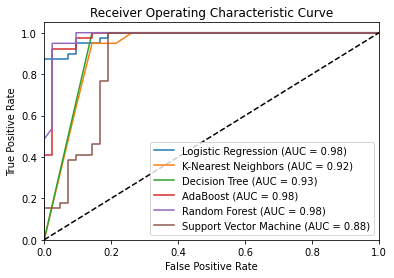

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define models
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'K-Nearest Neighbors': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Support Vector Machine': SVC(probability=True)}

# Plot ROC curve for all models
for name, model in models.items():
    print(name)
    print('---')
    # Train classifier on training set
    model.fit(X_train, y_train)

    # Compute predicted probabilities for testing set
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute false positive rate, true positive rate, and threshold
    fpr, tpr, threshold = roc_curve(y_test, y_prob)
    
    # Compute area under the curve
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
